This is converted to PDF for sake of readability, the code itself can be found on the following github repository:
https://github.com/tvanbiemen/EconOfCs

In [16]:
#Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib_venn import venn3, venn3_circles

In [17]:
#Extra packages
import random
import socket
import struct

In [18]:
#Dataset 1, this takes some time to load
#The website is sometimes down..... http://downforeveryoneorjustme.com/cybercrime-tracker.net
cybercrime = pd.read_html('http://cybercrime-tracker.net/index.php?s=0&m=40000')
cybercrime = cybercrime[0] #We want the first table that is found
cybercrime.head()

,-::DATE,-::URL,-::IP,-::TYPE,Unnamed: 4
0,08-11-2017,mfmqatar.com/deux/windsor/admin.php,198.38.82.246,Pony,NaN
1,08-11-2017,191.101.245.31/panel/,NaN,AZORult,NaN
2,08-11-2017,tapkinoski.gdn.cp-tr-1.webhostbox.net/index.php,5.100.156.10,TVRAT,NaN
3,08-11-2017,finexp.us/hk/hs/HSB/config.php?account=taliban,5.206.224.14,Formbook,NaN
4,08-11-2017,brainboom.000webhostapp.com/,145.14.145.219,Betabot,NaN


In [19]:
#Dataset 2
Zeus = pd.read_html('https://zeustracker.abuse.ch/monitor.php?filter=all', header=0)
Zeus = Zeus[1] # we need the second table that is found
Zeus.head()

,Dateadded,Malware,Host,IP address,Level,Status,Files Online,SBL,Country,AS number,Uptime
0,2017-11-07,Citadel,slap.alliancekl.com,NaN,4,offline,0,Not listed,-,NaN,50:10:43
1,2017-11-06,VMZeuS,bestframingnailerreview.com,104.243.42.202,2,online,0,Not listed,NaN,AS20473,74:01:57
2,2017-10-23,Citadel,flex.comonwealthplc.com,37.49.225.131,4,online,0,SBL374926,NaN,AS50673,408:04:02
3,2017-10-22,VMZeuS,kjkdndskjl.info,NaN,4,offline,0,Not listed,-,NaN,123:58:31
4,2017-10-21,Citadel,193.0.178.27,193.0.178.27,4,unknown,0,Not listed,NaN,AS57062,-


In [20]:
#Dataset 3, requires a bit more cleaning
Ransomware = pd.read_csv('https://ransomwaretracker.abuse.ch/feeds/csv/', skiprows=8, encoding = "ISO-8859-1", parse_dates=True)
iplistsplt =  Ransomware['IP address(es)'].astype(str).str.split('|')
Ransomware['IP address(es)'] = [item[0] for item in iplistsplt]
countrytsplt =  Ransomware['Country'].astype(str).str.split('|')
Ransomware['Country'] = [item[0] for item in countrytsplt]
Ransomware = Ransomware.iloc[:-1,:]
Ransomware.tail()

,# Firstseen (UTC),Threat,Malware,Host,URL,Status,Registrar,IP address(es),ASN(s),Country
13717,2015-04-15 14:00:53,C2,CryptoWall,marcortes.com,http://marcortes.com/img5.php,offline,OVH,91.134.158.216,16276,FR
13718,2015-03-07 13:46:58,C2,CryptoWall,drdigitalmd.com,http://drdigitalmd.com/img1.php,offline,PDR LTD. D/B/A PUBLICDOMAINREGISTRY.COM,192.210.234.140,36352,US
13719,2015-03-04 12:10:59,C2,CryptoWall,rajsima87.com,http://rajsima87.com/img2.php,offline,"eNom, Inc.",nan,NaN,nan
13720,2015-03-02 04:14:59,C2,CryptoWall,jauregia.net,http://jauregia.net/img5.php,offline,"TECNOCRATICA CENTRO DE DATOS, S.L.",185.92.246.115,201446,ES
13721,2015-03-02 01:18:48,C2,CryptoWall,lzclient.com,http://lzclient.com/img4.php,offline,"eNom, Inc.",nan,NaN,nan


In [21]:
#Create a list of random IP adresses for comparison
Random_Ips = []
n = 15000
for i in range (0,n):
    Random_Ips.append(socket.inet_ntoa(struct.pack('>I', random.randint(1, 0xffffffff))))
    print(' Drawing IP no:' + str(i), end='\r')
print("Drew " +str(n)+ " random IP adresses") 
Random_Ips = pd.DataFrame({'ip':Random_Ips})


Drew 15000 random IP adresses


In [22]:
#Print out the ten most commons IP adresses in the datasets
cybercrime['-::IP'].value_counts()[0:10], Zeus['IP address'].value_counts()[0:10],Ransomware['IP address(es)'].value_counts()[1:11]

(62.109.9.188       83
 198.105.221.5      71
 174.127.78.72      66
 108.162.199.107    58
 198.176.28.49      45
 66.45.253.74       33
 172.93.106.18      33
 108.170.51.58      31
 108.61.47.186      31
 198.1.80.203       31
 Name: -::IP, dtype: int64, 104.238.158.106    17
 FastFlux Botnet    14
 141.8.226.58        9
 198.54.117.212      3
 5.9.107.19          3
 144.76.115.36       3
 66.45.245.150       2
 80.78.250.26        2
 186.250.244.100     2
 195.20.44.100       1
 Name: IP address, dtype: int64, 184.105.192.2     242
 127.0.0.1         239
 213.205.40.169    170
 195.157.15.100     84
 204.11.56.48       71
 80.150.6.138       65
 95.211.144.65      47
 112.140.42.29      47
 52.71.185.125      46
 208.100.26.234     38
 Name: IP address(es), dtype: int64)

In [23]:
#Print out the ten most commons hosts in the datasets
Zeus['Host'].value_counts()[1:10],Ransomware['Host'].value_counts()[0:10]

(lisovfoxcom.418.com1.ru    1
 prtscrinsertcn.net         1
 120.63.157.195             1
 atmape.ru                  1
 gyodundena.hotmail.ru      1
 trust-s-b.com              1
 dl.dropbox.com             1
 nicktung.com               1
 noonepa.tk                 1
 Name: Host, dtype: int64, bolizarsospos.com          84
 mafianeedsyouqq.com        22
 gutentagmeinliebeqq.com    21
 itsyourtimeqq.su           21
 goonwithmazerqq.com        19
 helloyoungmanqq.com        18
 facerecognition.com.ba     13
 lenovowantsyouqq.com       12
 invoiceholderqq.com        11
 thisisyourchangeqq.com     11
 Name: Host, dtype: int64)

In [24]:
#Print out the ten most commons hosts in the datasets
Zeus['Country'].value_counts()[0:10],Ransomware['Country'].value_counts()[0:10] #Zeus html version does not give us country names, need to get it from statistics table

(-    284
 Name: Country, dtype: int64, nan    4462
 US     3253
 DE      634
 RU      547
 NL      412
 IT      404
 GB      353
 FR      273
 CN      225
 PL      225
 Name: Country, dtype: int64)

In [25]:
#Print out the ten most common malware types in each dataset
cybercrime['-::TYPE'].value_counts()[0:10], Zeus['Malware'].value_counts()[0:10],Ransomware['Malware'].value_counts()[0:10]

(Pony         2698
 ZeuS         2325
 Citadel      1175
 Blackhole     850
 WSO           400
 IceIX         299
 Stealer       255
 Mailer        193
 Betabot       182
 Solar         178
 Name: -::TYPE, dtype: int64, ZeuS       192
 Citadel    163
 VMZeuS      69
 KINS        46
 Ice IX      10
 Name: Malware, dtype: int64, Locky            11303
 Cerber            1573
 TeslaCrypt         477
 CryptoWall         203
 TorrentLocker      120
 PayCrypt            21
 Sage                 9
 CTB-Locker           6
 PadCrypt             4
 FAKBEN               3
 Name: Malware, dtype: int64)

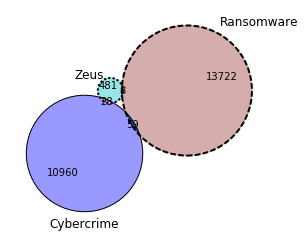

In [37]:
#Venn plot

a = Zeus['IP address']
b = Ransomware['IP address(es)']
c = cybercrime['-::IP']

s = (
    len(a),    # Abc
    len(b),    # aBc
    len(set.intersection(set(a), set(b))),    # ABc
    len(c),    # abC
    len(set.intersection(set(a), set(c))),    # AbC
    len(set.intersection(set(b), set(c))),  # aBC
    len(set.intersection(set(a), set(b), set(c))),   # ABC
)
v = venn3(subsets=s, set_labels=('Zeus', 'Ransomware', 'Cybercrime'))

# Subset labels
v.get_label_by_id('100').set_text(str(len(a)))
v.get_label_by_id('010').set_text(str(len(b)))
v.get_label_by_id('110').set_text(str(len(set.intersection(set(a), set(b)))))
v.get_label_by_id('001').set_text(str(len(c)))
v.get_label_by_id('101').set_text(str(len(set.intersection(set(a), set(c)))))
v.get_label_by_id('011').set_text(str(len(set.intersection(set(b), set(c)))))
#v.get_label_by_id('111').set_text(str(len(set.intersection(set(a), set(b), set(c)))))

# Subset colors
v.get_patch_by_id('100').set_color('c')
v.get_patch_by_id('010').set_color('#993333')
v.get_patch_by_id('110').set_color('blue')

# Subset alphas
v.get_patch_by_id('101').set_alpha(0.4)
v.get_patch_by_id('011').set_alpha(1.0)
#v.get_patch_by_id('111').set_alpha(0.7)

# Border styles
c = venn3_circles(subsets=s, linestyle='solid')
c[0].set_ls('dotted')  # Line style
c[1].set_ls('dashed')
c[2].set_lw(1.0)       # Line width
plt.figure(figsize=(15,15))
plt.show()


In [38]:
def fracx(a):
    #Creates x values for plotting cumulative fractions
    a = np.array(list(range(0,len(a))))/len(a)
    return a

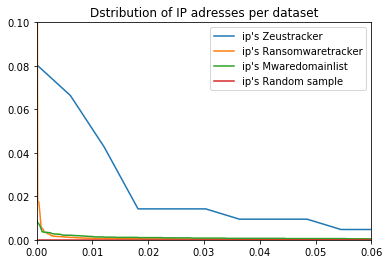

In [39]:
a = Zeus['IP address'].value_counts(normalize=True)
b = Ransomware['IP address(es)'].value_counts(normalize=True)
c = cybercrime['-::IP'].value_counts(normalize=True)
d = Random_Ips['ip'].value_counts(normalize=True)

ax = plt.subplot()

plt.plot(fracx(a),a, label="ip's Zeustracker")
plt.plot(fracx(b),b, label="ip's Ransomwaretracker")
plt.plot(fracx(c),c, label="ip's Mwaredomainlist")
plt.plot(fracx(d),d, label="ip's Random sample")

ax.set_xlim(0,0.06)
ax.set_ylim(0,0.1)
plt.title('Dstribution of IP adresses per dataset')

plt.legend()
plt.show()

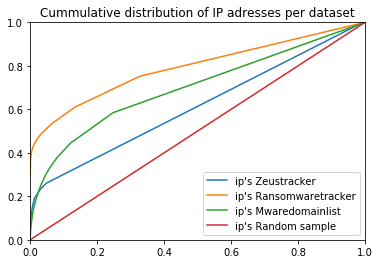

In [40]:
a = Zeus['IP address'].value_counts(normalize=True).cumsum()
b = Ransomware['IP address(es)'].value_counts(normalize=True).cumsum()
c = cybercrime['-::IP'].value_counts(normalize=True).cumsum()
d = Random_Ips['ip'].value_counts(normalize=True).cumsum()

ax = plt.subplot()

plt.plot(fracx(a),a, label="ip's Zeustracker")
plt.plot(fracx(b),b, label="ip's Ransomwaretracker")
plt.plot(fracx(c),c, label="ip's Mwaredomainlist")
plt.plot(fracx(d),d, label="ip's Random sample")

ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.title('Cummulative distribution of IP adresses per dataset')

plt.legend()
plt.show()

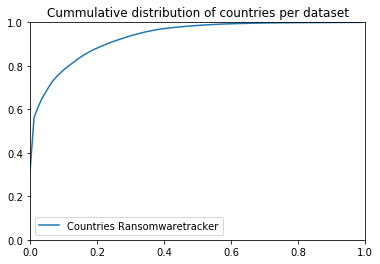

In [41]:
# Plot the cumulative distribution of countries
b = Ransomware['Country'].value_counts(normalize=True)
ax = plt.subplot()


plt.plot(fracx(b),b.cumsum(), label="Countries Ransomwaretracker")
plt.title('Cummulative distribution of countries per dataset')

ax.set_xlim(0,1)
ax.set_ylim(0,1)

plt.legend()
plt.show()

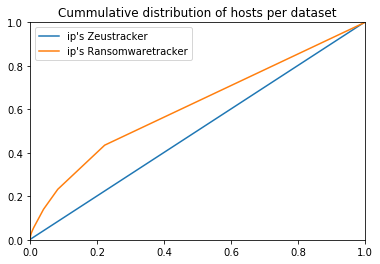

In [42]:
a = Zeus['Host'].value_counts(normalize=True).cumsum()
b = Ransomware['Host'].value_counts(normalize=True, dropna=False).cumsum()


ax = plt.subplot()

plt.plot(fracx(a),a, label="ip's Zeustracker")
plt.plot(fracx(b),b, label="ip's Ransomwaretracker")


ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.title('Cummulative distribution of hosts per dataset')

plt.legend()
plt.show()

In [43]:
# This function prints out the outcomes of our statistics test
def ks_samp(a,b):
    print(stats.ks_2samp(a,b))

In [44]:
a = Zeus['IP address'].value_counts(normalize=True).cumsum()
b = Ransomware['IP address(es)'].value_counts(normalize=True).cumsum()
c = cybercrime['-::IP'].value_counts(normalize=True).cumsum()
d = Random_Ips['ip'].value_counts(normalize=True).cumsum()

In [45]:
# Perform the statistical tests
ks_samp(a,b) #Accept 0 hyp (from same dist.) if p>0.05
ks_samp(b,c) #Accept 0 hyp (from same dist.) if p>0.05
ks_samp(a,c) #Accept 0 hyp (from same dist.) if p>0.05
ks_samp(a,d) #Accept 0 hyp (from same dist.) if p>0.05
ks_samp(b,d) #Accept 0 hyp (from same dist.) if p>0.05
ks_samp(c,d) #Accept 0 hyp (from same dist.) if p>0.05

Ks_2sampResult(statistic=0.36752090639330998, pvalue=1.4830729305974341e-19)
Ks_2sampResult(statistic=0.22438511318167625, pvalue=1.4387054376873975e-110)
Ks_2sampResult(statistic=0.22104204385435527, pvalue=2.4255996810306513e-07)
Ks_2sampResult(statistic=0.21211515151515151, pvalue=6.221236023578169e-07)
Ks_2sampResult(statistic=0.47685143422354104, pvalue=0.0)
Ks_2sampResult(statistic=0.33757304365318852, pvalue=0.0)


In [46]:
#Calcuate the % up per country metric
a = Ransomware[Ransomware['Status'] == 'offline'].Country.value_counts()
b = Ransomware[Ransomware['Status'] == 'online'].Country.value_counts()
(b/(a+b)).dropna().sort_values(ascending=False)[0:10]

BE    0.285714
FI    0.250000
GB    0.246459
IL    0.166667
IR    0.105263
SK    0.090909
AR    0.086957
KR    0.083333
TH    0.080882
ID    0.072917
Name: Country, dtype: float64

In [47]:
#Calculate the % up per host metric
a = Ransomware[Ransomware['Status'] == 'offline'].Host.value_counts()
b = Ransomware[Ransomware['Status'] == 'online'].Host.value_counts()
#c = a + b
(b/(a+b)).dropna().sort_values(ascending=False)[0:10]

bolizarsospos.com                 0.964286
wt7dzbn78.homepage.t-online.de    0.666667
galeona.com                       0.666667
greatgoods2.bravepages.com        0.666667
www.resumebuddy.net               0.500000
3e.com.pt                         0.500000
bptpm.sragenkab.go.id             0.500000
demo.evgesha.ru                   0.500000
flax-fiber.com                    0.500000
hjhqmbxyinislkkt.15u3kg.top       0.500000
Name: Host, dtype: float64

In [48]:
# Prepare the kruskal test to see if number of ransomware per country is distributed similarly between datasets
b = pd.DataFrame(Ransomware['Country'].value_counts())
needed = ['US','DE','RU','NL','CH','CN','CA','IN','BR','TH']
lista = b[b.index.isin(needed)].Country
listb = [36,27,17,15,10,6,5,5,5,5]
stats.kruskal(lista,listb) # p<0.5, so not simmilar


KruskalResult(statistic=14.393939393939387, pvalue=0.00014827877260963348)

In [49]:
#Make dates plotable
cybercrime['-::DATE'] = pd.to_datetime(cybercrime['-::DATE'])
Zeus['Dateadded'] = pd.to_datetime(Zeus['Dateadded'])
Ransomware["# Firstseen (UTC)"] = pd.to_datetime(Ransomware["# Firstseen (UTC)"])


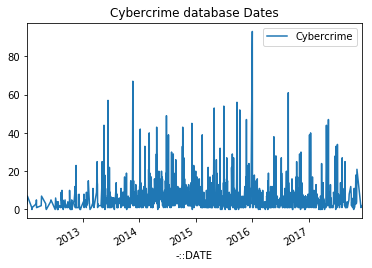

In [50]:
#Plot entries per date for Cybercrime
cybercrime.groupby('-::DATE').count().iloc[1:,1].plot(label='Cybercrime', title='Cybercrime database Dates')
plt.legend()
plt.show()

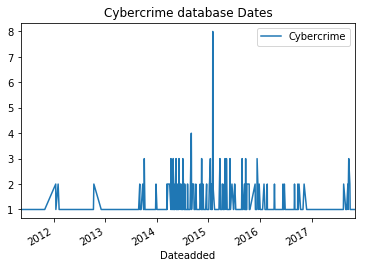

In [51]:
#Plot entries per date for Zeus
Zeus.groupby('Dateadded').count()['Status'].plot(label='Cybercrime', title='Cybercrime database Dates')
plt.legend()
plt.show()

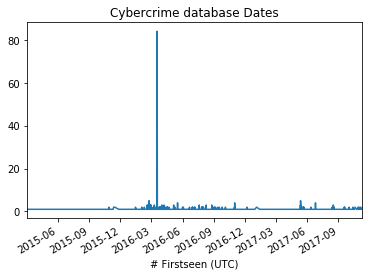

In [52]:
#Plot entries per date for Ransomware
Ransomware.groupby("# Firstseen (UTC)").count().Status.plot(label='Cybercrime', title='Cybercrime database Dates')
plt.show()

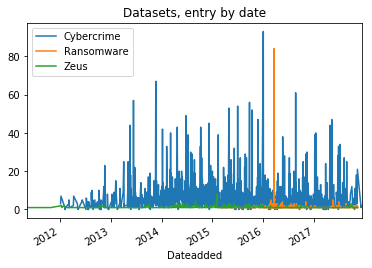

In [53]:
#Plot for all
cybercrime.groupby('-::DATE').count().iloc[1:,1].plot(label='Cybercrime')
Ransomware.groupby("# Firstseen (UTC)").count().Status.plot(label='Ransomware')
Zeus.groupby('Dateadded').count()['Status'].plot(label='Zeus', title='Datasets, entry by date')

plt.legend()
plt.show()